### Hi - Thanks for reaching out! I'd be happy to answer your questions. Let me just prep a few things.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### And let me load the data quickly as well.

In [2]:
df_orders = pd.read_csv('Data\Simplified orders.zip')
df_summarized_orders = pd.read_csv('Data\summarized orders.csv')
df_restaurants = pd.read_csv('Data\Restaurants.csv')

### Now let's take a look at each of your questions one by one.

### *1) In the data that I have for summarized orders by location by day, I'm only seeing 261 rows for Bryant Park. Is this because Bryant Park is closed on weekends? Can you do a quick check to see if that's the case?*

### Good hypothesis, let's see shall we?

In [3]:
df_summarized_orders.head()

,location,day,number of orders,percentage of deliveries
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


In [4]:
df_summarized_orders.day = pd.to_datetime(df_summarized_orders.day)

In [5]:
df_summarized_orders.columns = ['LOCATION', 'DATE', 'NUM_ORDERS', 'PERC_DELIVERY']

In [6]:
df_summarized_orders['DAY_OF_WEEK'] = df_summarized_orders['DATE'].dt.day_name()

In [7]:
df_summarized_orders[df_summarized_orders.LOCATION == 'Bryant Park']['DAY_OF_WEEK'].value_counts(normalize = True)

Monday       0.203065
Tuesday      0.199234
Wednesday    0.199234
Thursday     0.199234
Friday       0.199234
Name: DAY_OF_WEEK, dtype: float64

### Yes, you are correct. Bryant Park only has 261 records because it was never open on a weekend.

### *2) Which of our locations has the single day with the highest number of sales? Is there anything special about this day (e.g. is it a holiday or something)?*

In [8]:
df_summarized_orders.sort_values('NUM_ORDERS', ascending = False).head(1)

,LOCATION,DATE,NUM_ORDERS,PERC_DELIVERY,DAY_OF_WEEK
1530,NYU,2018-06-24,1396,0.063754,Sunday


### The NYU location had the single day with the highest number of sales on 6/24/18. This was the day of The Pride March and Pride Fest, two of the biggest NYC Pride events that just happen to be in the same neighborhood as our NYU location.

### *3) What if I wanted to see the day with the most sales at a particular location (e.g. Bryant Park)? Can you help me figure out which location has the most sales on a weekday?*

### Yes, you can definitely find the answers to your questions by simply replacing the filter (currently set to Bryant Park) with whatever location you want to find the day with the most sales of.

In [9]:
df_summarized_orders[df_summarized_orders.LOCATION == 'Bryant Park'].sort_values('NUM_ORDERS', ascending = False).head(1)

,LOCATION,DATE,NUM_ORDERS,PERC_DELIVERY,DAY_OF_WEEK
250,Bryant Park,2018-12-17,1055,0.08436,Monday


### As for which location has the most sales on a weekday, we can use the same code from the answer to your second question and just filter out Saturdays and Sundays.

In [10]:
df_summarized_orders[(df_summarized_orders['DAY_OF_WEEK'] != 'Saturday') & (df_summarized_orders['DAY_OF_WEEK'] != 'Sunday')].sort_values('NUM_ORDERS', ascending = False).head(1)

,LOCATION,DATE,NUM_ORDERS,PERC_DELIVERY,DAY_OF_WEEK
1406,NYU,2018-02-20,1371,0.068563,Tuesday


### Looks like the location with the most weekday sales was also NYU, but on 2/20/18.

### *4) One of the things I'm most excited about is expanding beyond eating in, to delivery, pick-up orders, and catering. Can you help me find the percentage of orders at each restaurant that are deliveries?  I want over all time - not just one particular day.*

### Sure, I'll have to first add a column for delivery orders to calculate the %. Please see below.

In [11]:
df_summarized_orders['DELIVERY_ORDERS'] = df_summarized_orders.NUM_ORDERS * df_summarized_orders.PERC_DELIVERY

In [24]:
df_summarized_orders.tail()

,LOCATION,DATE,NUM_ORDERS,PERC_DELIVERY,DAY_OF_WEEK,DELIVERY_ORDERS
2801,Williamsburg,2018-12-27,941,0.089267,Thursday,84.0
2802,Williamsburg,2018-12-28,941,0.127524,Friday,120.0
2803,Williamsburg,2018-12-29,942,0.093418,Saturday,88.0
2804,Williamsburg,2018-12-30,933,0.114684,Sunday,107.0
2805,Williamsburg,2018-12-31,957,0.114943,Monday,110.0


In [13]:
100 * df_summarized_orders.groupby('LOCATION')['DELIVERY_ORDERS'].sum() / df_summarized_orders.groupby('LOCATION')['NUM_ORDERS'].sum()

LOCATION
Bryant Park         6.864517
Columbia           10.066186
Flatiron           10.234305
Midtown             6.880544
NYU                10.051989
Upper East Side    18.938113
Upper West Side    18.968583
Williamsburg       10.112688
dtype: float64

### *5) Lastly, I need some demand analysis to help me figure out staffing. Can you help me understand what the distribution of orders looks like at each restaurant broken down by hour of day?*

### Sure, let's go through our orders data by restaurant, and plot histograms broken down by hour of day.

In [14]:
df_restaurants.sort_values('RESTAURANT_ID')

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,5/21/2013,2018-05-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
6,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,5/29/2014,2017-08-02
7,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2/2/2015,2017-08-02
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01


In [15]:
df_orders.DATETIME = pd.to_datetime(df_orders.DATETIME)

<AxesSubplot:ylabel='Frequency'>

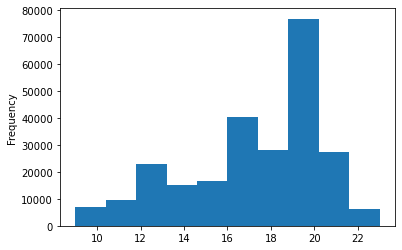

In [30]:
#Columbia
df_orders[df_orders.RESTAURANT_ID == 'R10001'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

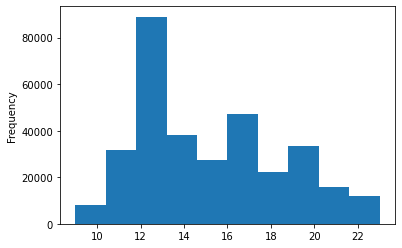

In [17]:
#Midtown
df_orders[df_orders.RESTAURANT_ID == 'R10002'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

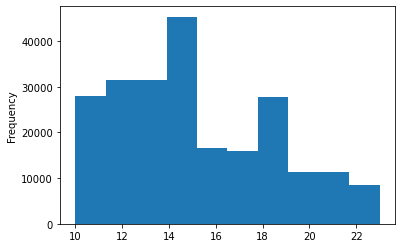

In [18]:
#Bryant Park
df_orders[df_orders.RESTAURANT_ID == 'R10003'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

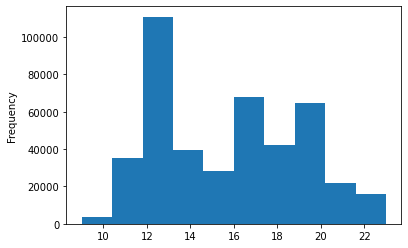

In [19]:
#NYU
df_orders[df_orders.RESTAURANT_ID == 'R10004'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

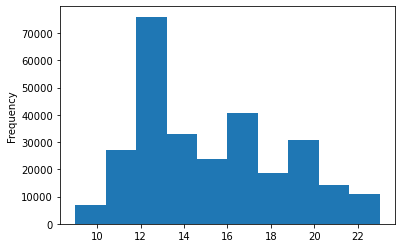

In [20]:
#Flatiron
df_orders[df_orders.RESTAURANT_ID == 'R10005'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

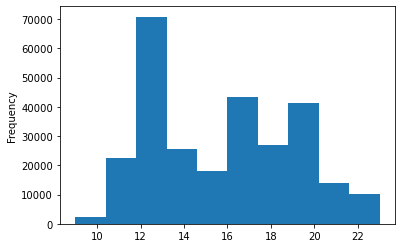

In [21]:
#Upper East Side
df_orders[df_orders.RESTAURANT_ID == 'R10006'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

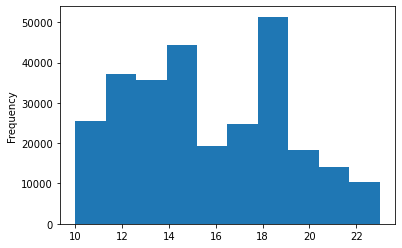

In [22]:
#Upper West Side
df_orders[df_orders.RESTAURANT_ID == 'R10007'].DATETIME.dt.hour.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

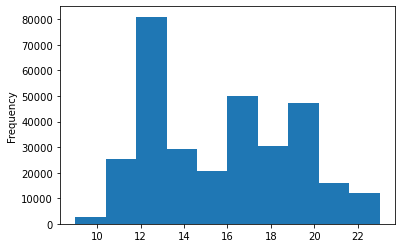

In [23]:
#Williamsburg
df_orders[df_orders.RESTAURANT_ID == 'R10008'].DATETIME.dt.hour.plot(kind = 'hist')

### Hope that helped. Let me know if you need anything else!